<a href="https://colab.research.google.com/github/sophisticated21/Advanced-TimeSeries-Forecasting-AMD/blob/main/Outlier_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL


In [ ]:
df = pd.read_csv('/content/AMD_merged (1).csv')
df.head()

,Date,Open,High,Low,Close,Volume,SMA_20,SMA_50,EMA_20,EMA_50,...,Treasury10Y_Open,Treasury10Y_High,Treasury10Y_Low,Treasury10Y_Close,Treasury10Y_Volume,USD_Index_Open,USD_Index_High,USD_Index_Low,USD_Index_Close,USD_Index_Volume
0,2020-01-02,46.860001,49.250000,46.630001,49.099998,80331100.0,43.0105,39.2072,43.672210,39.912493,...,1.882,1.903,1.851,1.903,0.0,96.849998,96.870003,96.430000,96.480003,0.0
1,2020-01-03,48.029999,49.389999,47.540001,48.599998,73127400.0,43.4560,39.5490,44.141523,40.253179,...,1.788,1.840,1.786,1.828,0.0,96.839996,97.110001,96.709999,96.790001,0.0
2,2020-01-06,48.020000,48.860001,47.860001,48.389999,47934900.0,43.8945,39.8896,44.546140,40.572270,...,1.811,1.816,1.766,1.785,0.0,96.669998,96.900002,96.540001,96.900002,0.0
3,2020-01-07,49.349998,49.389999,48.040001,48.250000,58061400.0,44.3255,40.2202,44.898888,40.873358,...,1.827,1.828,1.797,1.797,0.0,96.980003,97.089996,96.620003,96.650002,0.0
4,2020-01-08,47.849998,48.299999,47.139999,47.830002,53767000.0,44.7705,40.5226,45.178042,41.146167,...,1.874,1.876,1.802,1.823,0.0,97.300003,97.330002,96.820000,96.830002,0.0


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

df = df.set_index("Date")

In [ ]:
df = df.apply(pd.to_numeric, errors="ignore")

zero_cols = (df.fillna(0) == 0).all()

cols_to_drop = zero_cols[zero_cols].index.tolist()
print("Zero columns:", cols_to_drop)

df = df.drop(columns=cols_to_drop)

Zero columns: [' VIX_Volume', ' Treasury10Y_Volume', ' USD_Index_Volume']


/tmp/ipython-input-378198246.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors="ignore")


In [ ]:
df["Day_of_Week"] = df.index.dayofweek

In [ ]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20',
       'EMA_50', 'WMA_20', 'ADX_14', 'RSI_14', 'ROC_10', 'MACD', 'MACD_signal',
       'MACD_hist', 'BBL', 'BBM', 'BBU', 'ATR_14', 'OBV', 'MFI_14', 'CMF_20',
       ' Gold_Open', ' Gold_High', ' Gold_Low', ' Gold_Close', ' Gold_Volume',
       ' Silver_Open', ' Silver_High', ' Silver_Low', ' Silver_Close',
       ' Silver_Volume', ' Oil_Open', ' Oil_High', ' Oil_Low', ' Oil_Close',
       ' Oil_Volume', ' NASDAQ_Open', ' NASDAQ_High', ' NASDAQ_Low',
       ' NASDAQ_Close', ' NASDAQ_Volume', ' VIX_Open', ' VIX_High', ' VIX_Low',
       ' VIX_Close', ' Treasury10Y_Open', ' Treasury10Y_High',
       ' Treasury10Y_Low', ' Treasury10Y_Close', ' USD_Index_Open',
       ' USD_Index_High', ' USD_Index_Low', ' USD_Index_Close', 'Day_of_Week'],
      dtype='object')


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,SMA_20,SMA_50,EMA_20,EMA_50,WMA_20,...,VIX_Close,Treasury10Y_Open,Treasury10Y_High,Treasury10Y_Low,Treasury10Y_Close,USD_Index_Open,USD_Index_High,USD_Index_Low,USD_Index_Close,Day_of_Week
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-24,127.510002,127.510002,124.660004,126.290001,24829600.0,131.374500,140.998001,129.874623,138.323809,127.702047,...,16.969999,4.591,4.629,4.583,4.609,108.260002,108.300003,107.919998,108.160004,1
2024-12-26,125.519997,127.300003,125.050003,125.059998,24998200.0,130.741499,140.366401,129.416088,137.803660,127.100666,...,14.990000,4.579,4.641,4.573,4.631,108.129997,108.300003,108.029999,108.169998,3
2024-12-27,124.370003,126.180000,122.260002,125.190002,32924000.0,130.188999,139.747601,129.013603,137.309006,126.571952,...,15.380000,4.619,4.623,4.575,4.603,108.000000,108.199997,107.870003,108.080002,4
2024-12-30,123.559998,124.099998,122.349998,122.440002,30501600.0,129.452000,139.071401,128.387546,136.725908,125.833952,...,17.209999,4.545,4.577,4.537,4.577,108.129997,108.379997,107.739998,108.010002,0
2024-12-31,123.099998,123.550003,120.139999,120.790001,30203400.0,128.388500,138.367801,127.663970,136.100971,125.009000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
df = df.iloc[:-1]
print(df.isna().sum()[df.isna().sum() > 0])

Series([], dtype: int64)


In [ ]:
df["log_return"] = np.log(df["Close"].shift(-1) / df["Close"])
df = df.dropna(subset=["log_return"])

In [ ]:
df = df.iloc[:-1]
print(df.isna().sum()[df.isna().sum() > 0])

Series([], dtype: int64)


In [ ]:
df.shape

(1255, 57)

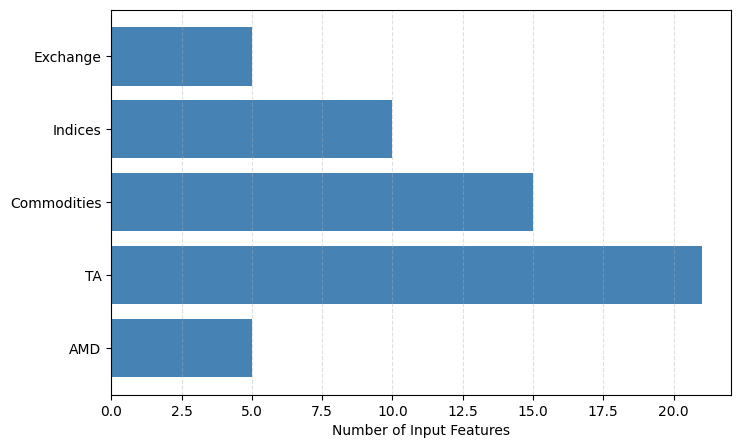

In [ ]:
feature_counts = {
    "AMD": 5,
    "TA": 21,
    "Commodities": 15,
    "Indices": 10,
    "Exchange": 5
}

plt.figure(figsize=(8,5))
plt.barh(list(feature_counts.keys()), list(feature_counts.values()), color="steelblue")
plt.xlabel("Number of Input Features")
plt.grid(axis="x", linestyle="--", alpha=0.4)
# plt.savefig("fig/feature_groups_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

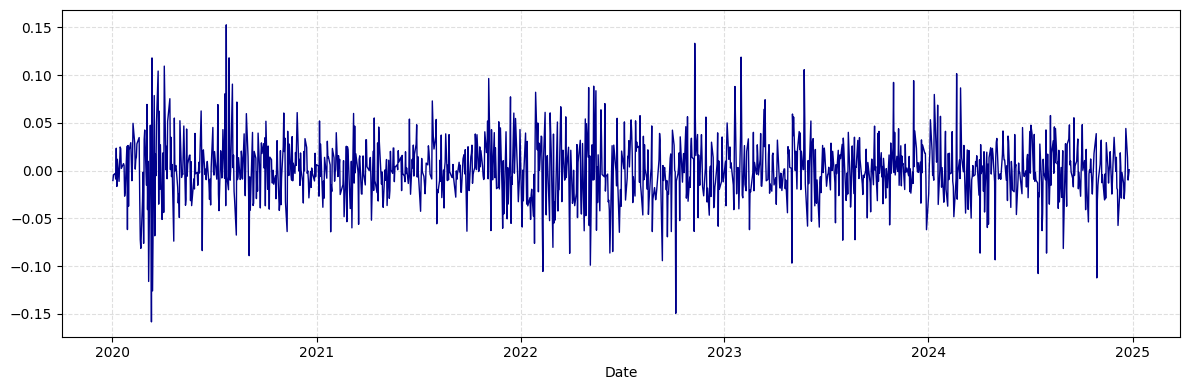

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df["log_return"], color="darkblue", linewidth=1)
plt.xlabel("Date")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
# plt.savefig("fig/log_return.png", dpi=300, bbox_inches="tight")
plt.show()

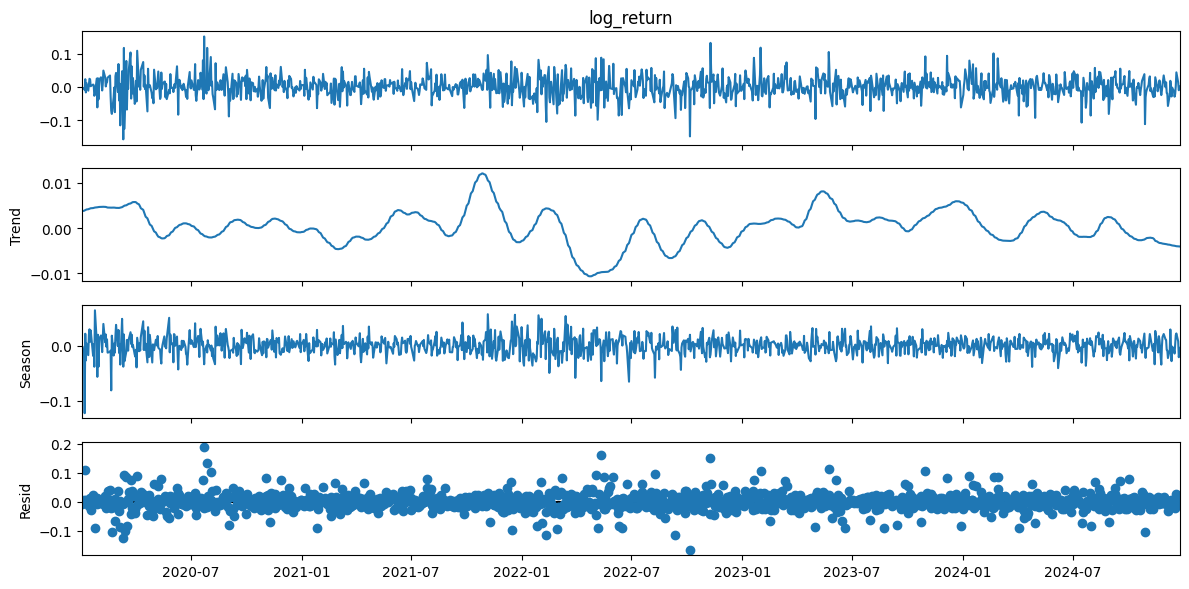

In [ ]:
stl = STL(df["log_return"], period=30, robust=True)
result = stl.fit()

fig = result.plot()
fig.set_size_inches(12, 6)
plt.tight_layout()
# plt.savefig("fig/stl_log_return.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
residual = result.resid   # already computed by teammate

std = residual.std()
threshold = 3 * std

outlier_mask = abs(residual) > threshold
outliers = residual[outlier_mask]

df_cleaned = df.loc[~outlier_mask].copy()
print("Number of outliers:", len(outliers))

Number of outliers: 30


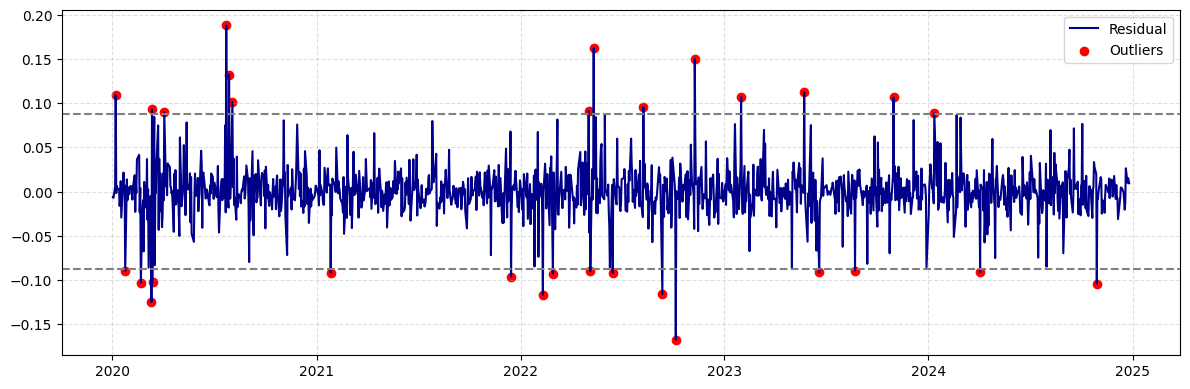

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(residual, label="Residual", color="darkblue")
plt.scatter(outliers.index, outliers, color="red", label="Outliers")
plt.axhline(threshold, color="gray", linestyle="--")
plt.axhline(-threshold, color="gray", linestyle="--")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()